In [1]:
import os
import sys
import pathlib

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from utils.processImage import get_subimage, process_image, plot_subimages
from utils.solver import solve_sudoku

TEST_IMAGES = pathlib.Path.cwd().parent.joinpath("test_images")

## Example 1: A good quality, straight image from the internet. 

In [2]:
fp=TEST_IMAGES.joinpath("sudoku_test.png")

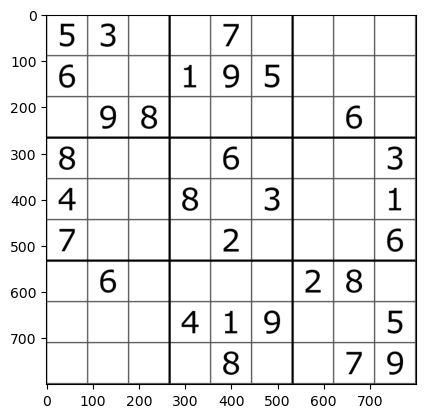

In [3]:
image = imread(fp)
image = rgb2gray(image[:,:,:3])
plt.imshow(image, cmap='gray')
plt.show()

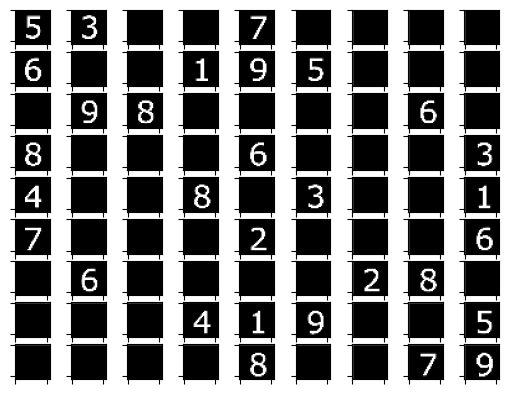

True

In [4]:
plot_subimages(image)

0.9964724393158624


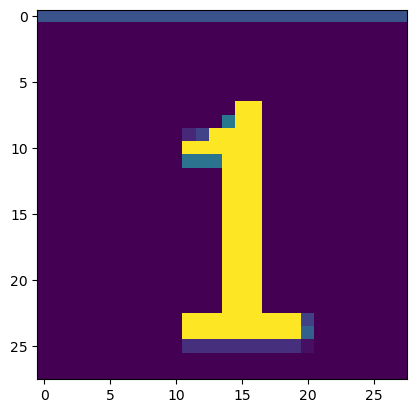

In [5]:
wrong = get_subimage(image,7,4)
plt.imshow(get_subimage(image,7,4))
print(wrong.mean())

In [6]:
s=process_image(fp)
s

c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\skimage\filters\thresholding.py:370: RuntimeWarning: invalid value encountered in divide
  mean1 = np.cumsum(counts * bin_centers) / weight1


3/3 [==============================] - 0s 1ms/step


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 0 0 0 0 0 6 0]
 [0 0 0 0 6 0 0 0 3]
 [4 0 0 0 0 3 0 0 0]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 0 0]
 [0 0 0 4 3 9 0 0 5]
 [0 0 0 0 0 0 0 7 9]]

In [7]:
solve_sudoku(s)

solved in 0 turns


[[5. 3. 0. 0. 7. 0. 0. 0. 0.]
 [6. 0. 0. 1. 9. 5. 0. 0. 0.]
 [0. 9. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 6. 0. 0. 0. 3.]
 [4. 0. 0. 0. 0. 3. 0. 0. 0.]
 [7. 0. 0. 0. 2. 0. 0. 0. 6.]
 [0. 6. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 4. 3. 9. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 7. 9.]]

## Example 2: From unwarped image



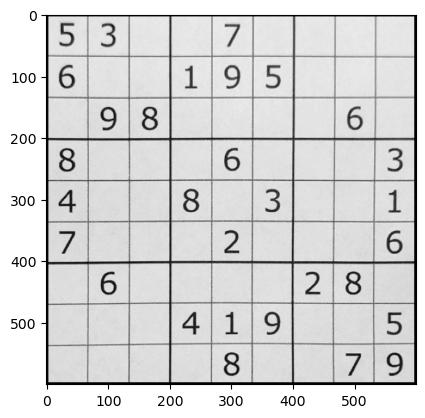

In [19]:
fp=TEST_IMAGES.joinpath("sudoku_wiki_unwarped.png")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
plt.imshow(image, cmap='gray')
plt.show()

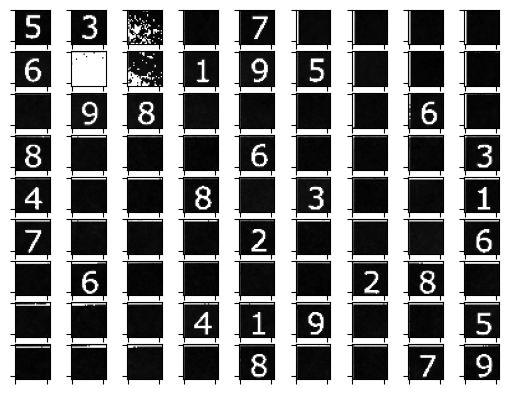

True

In [20]:
plot_subimages(image)

0.9969884876719797


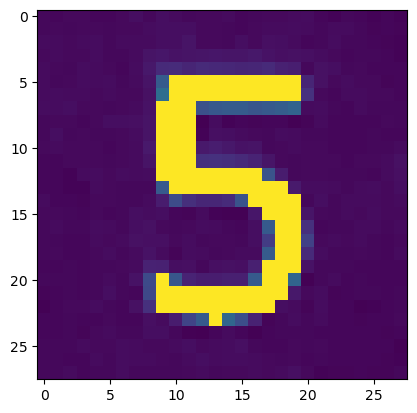

In [22]:
wrong = get_subimage(image,0,0)
plt.imshow(wrong)
print(wrong.mean())

In [23]:
s=process_image(fp)
s

3/3 [==============================] - 0s 1ms/step


[[0 0 8 8 2 8 2 0 8]
 [0 8 8 3 3 0 0 8 8]
 [8 0 8 8 8 8 8 0 8]
 [8 0 0 0 0 0 0 0 8]
 [8 0 8 8 8 8 0 0 0]
 [0 3 3 0 8 3 8 8 0]
 [0 0 0 0 0 0 8 8 0]
 [0 8 0 8 3 8 0 3 8]
 [0 8 8 8 8 0 8 0 8]]